# Chapter 4 - Vector Applications

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format

plt.rcParams.update({'font.size':14}) # set global fonts

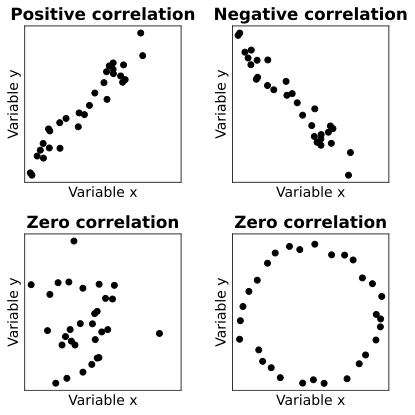

In [85]:
N = 30

# correlated random variables
x = np.linspace(0,10,N) + np.random.randn(N)
y = x + np.random.randn(N)

# set up figure
_,axs = plt.subplots(2,2,figsize=(6,6))

# positive correlation
axs[0,0].plot(x,y,'ko')
axs[0,0].set_title('Positive correlation', fontweight='bold')
axs[0,0].set_xlabel('Variable x')
axs[0,0].set_ylabel('Variable y')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].axis('square')

# negative correlation
axs[0,1].plot(x,-y,'ko')
axs[0,1].set_title('Negative correlation', fontweight='bold')
axs[0,1].set_xlabel('Variable x')
axs[0,1].set_ylabel('Variable y')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,1].axis('square')

# zero correlation, part 1
axs[1,0].plot(np.random.randn(N),np.random.randn(N),'ko')
axs[1,0].set_title('Zero correlation',fontweight='bold')
axs[1,0].set_xlabel('Variable x')
axs[1,0].set_ylabel('Variable y')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].axis('square')

# zero correlation, part 2
x = np.cos(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
y = np.sin(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
axs[1,1].plot(x,y,'ko')
axs[1,1].set_title('Zero correlation',fontweight='bold')
axs[1,1].set_xlabel('Variable x')
axs[1,1].set_ylabel('Variable y')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].axis('square')

plt.tight_layout()
plt.savefig('Figure_04_01.png',dpi=300)
plt.show()

# Coding Exercise

# Exercise 1

Write a Python function that takes two vectors as input and provides two numbers as output: the Pearson correlation coefficient and the cosine similarity value. Write code that follows the formulas presented in this chapter; don’t simply call `np.corrcoef` and `spatial.distance.cosine`. Check that the two output values are identical when the variables are already mean centered and different when the variables are not mean centered.

In [88]:
# the function
def corrAndCosine(x,y):

  # compute cosine similarity
  num = np.dot(x,y) # numerator
  den = np.linalg.norm(x) * np.linalg.norm(y) # denominator
  cos = num / den

  # compute correlation (similar to above but mean-centered!)
  xm  = x-np.mean(x)
  ym  = y-np.mean(y)
  num = np.dot(xm,ym) # numerator
  den = np.linalg.norm(xm) * np.linalg.norm(ym) # denominator
  cor = num / den

  return cor,cos


# test it
a = np.random.randn(15)
b = np.random.randn(15)

# compute the correlation and cosine
r,c = corrAndCosine(a,b)

# confirm that the correlation matches with np.corrcoef
print(r,np.corrcoef(a,b)[0,1])

0.42828991356314616 0.4282899135631462


In [89]:
# compare r and c without mean-centering
a = np.random.randn(15) + 10 # note the offset!
b = np.random.randn(15)

# mean-center
aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)


# show the results with and without mean-centering
print('Without mean-centering (should differ):')
print(corrAndCosine(a,b))
print(' ')

print('With mean-centering (should be the same):')
print( corrAndCosine(aNoMean,bNoMean) )


Without mean-centering (should differ):
(-0.14971178724398237, 0.2419668310005714)
 
With mean-centering (should be the same):
(-0.14971178724398237, -0.14971178724398237)


# Exercise 2

Let’s continue exploring the difference between correlation and cosine similarity. Create a variable containing the integers 0 through 3, and a second variable equaling the first variable plus some offset. You will then create a simulation in which you systematically vary that offset between −50 and +50 (that is, the first iteration of the simulation will have the second variable equal to [−50, −49, −48, −47]). In a for loop, compute the correlation and cosine similarity between the two variables and store these results. Then make a line plot showing how the correlation and cosine similarity are affected by the mean offset. You should be able to reproduce Figure 4-4.

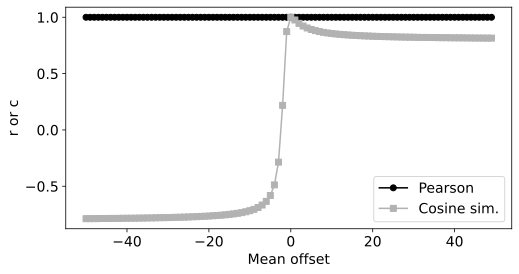

In [91]:
# create 2 variables
v1 = np.arange(4, dtype=float)
offsets = np.arange(-50,50)

# initialize the results and we will store the data here
results = np.zeros((len(offsets),2))

# create a simulation
for i in range(len(offsets)):
    results[i,:] = corrAndCosine(v1,v1+offsets[i])

# print(results)

# line plot
plt.figure(figsize=(8,4))
h = plt.plot(offsets, results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
plt.savefig('Figure_04_02.png', dpi=300)
plt.show()

# Exercise 3

There are several Python functions to compute the Pearson correlation coefficient. One of them is called `pearsonr` and is located in the `stats` module of the SciPy library. Open the source code for this file (hint: ??`functionname`) and make sure you understand how the Python implementation maps onto the formulas introduced in this chapter.

In [149]:
from scipy.stats import pearsonr

??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided', method=None)
Source:   
def pearsonr(x, y, *, alternative='two-sided', method=None):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelat

# Exercise 4

Your goal in this exercise is to determine whether your own bare-bones correlation function is faster than NumPy’s `corrcoef` function. Modify the function from Exercise 4-2 to compute only the correlation coefficient. Then, in a for loop over 1,000 iterations, generate two variables of 500 random numbers and compute the correlation between them. Time the for loop. Then repeat but using `np.corrcoef`. In my tests, the custom function was about 33% faster than `np.corrcoef`. In these toy examples, the differences are measured in milliseconds, but if you are running billions of correlations with large datasets, those milliseconds really add up! (Note that writing your own functions without input checks has the risk of input errors that would be caught by `np.corrcoef`.) (Also note that the speed advantage breaks down for larger vectors. Try it!)

In [206]:
import time

def corr(x,y):
  # compute correlation (similar to above but mean-centered!)
  xm  = x-np.mean(x)
  ym  = y-np.mean(y)
  num = np.dot(xm,ym) # numerator
  den = np.linalg.norm(xm) * np.linalg.norm(ym) # denominator
  cor = num / den

  return cor

# generate 2 variables
numIter = 1000
varLen = 500

start_time = time.time()
for i in range(numIter):
    x = np.random.randn(varLen,2)
    corr(x[:,0],x[:,1])
calc_Time1 = time.time() - start_time

start_time = time.time()
for i in range(numIter):
    x = np.random.randn(varLen,2)
    pearsonr(x[:,0],x[:,1])
calc_Time2 = time.time() - start_time

print(f'My Computation completed in {calc_Time1} seconds.')
print(f'Computation completed in {calc_Time2} seconds.')

My Computation completed in 0.13863182067871094 seconds.
Computation completed in 1.3132498264312744 seconds.


Object `np.random.randn()` not found.
